In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/ankitakokes/extracted-text")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ankitakokes
Your Kaggle Key: ··········


100%|██████████| 157k/157k [00:00<00:00, 35.7MB/s]

In [ ]:
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
freelancer_data = load_files(r"/content/extracted-text/Extracted text")
X, y = freelancer_data.data, freelancer_data.target

In [ ]:
# Feature Extraction
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(freelancer_data.data)
X_train_counts.shape

(274, 8261)

In [ ]:
# TF-IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(274, 8261)

In [ ]:
# Training Naive Bayes Classifier
clf = MultinomialNB().fit(X_train_tfidf, freelancer_data.target)

In [ ]:
# Building the Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])
text_clf = text_clf.fit(freelancer_data.data, freelancer_data.target)

In [ ]:
# NB Classifier Performance
predicted = text_clf.predict(freelancer_data.data)
np.mean(predicted == freelancer_data.target)

0.5437956204379562

In [ ]:
# Support Vector Machines(SVM) training
text_clf_svm = Pipeline([('vect', CountVectorizer()), 
                         ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42))])

In [ ]:
text_clf_svm = text_clf_svm.fit(freelancer_data.data, freelancer_data.target)
predicted_svm = text_clf_svm.predict(freelancer_data.data)
np.mean(predicted_svm == freelancer_data.target)

0.9890510948905109

In [ ]:
# Grid Search
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}

In [ ]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(freelancer_data.data, freelancer_data.target)

In [ ]:
gs_clf.best_score_
gs_clf.best_params_

{'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [ ]:
# Grid Search for SVM
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

In [ ]:
gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(freelancer_data.data, freelancer_data.target)

In [ ]:
gs_clf_svm.best_score_
gs_clf_svm.best_params_

{'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [ ]:
# Removing stop words
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Stemming Code
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

In [ ]:
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')
text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), 
                             ('mnb', MultinomialNB(fit_prior=False))])
text_mnb_stemmed = text_mnb_stemmed.fit(freelancer_data.data, freelancer_data.target)
predicted_mnb_stemmed = text_mnb_stemmed.predict(freelancer_data.data)

In [ ]:
np.mean(predicted_mnb_stemmed == freelancer_data.target)

0.9452554744525548

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [71]:
dir = r"/content/extracted-text/Extracted text/Android"
os.chdir(dir)
Android_docu = []

for file in os.listdir(dir):
    with open(file, "r", encoding="utf-8", errors='ignore') as input:
        for string in input:
            Android_docu.append(string)

In [72]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(Android_docu)

In [73]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [75]:
for i in range(true_k):
 print("Cluster %d:" % i),
for ind in order_centroids[i, :10]:
 print('%s' % terms[ind])

Cluster 0:
Cluster 1:
recyclewaala
zs
er
eotpecia
eon
eo
enabling
en
elec
el


In [77]:
print("Prediction")
X = vectorizer.transform(["recyclewaala"])
predicted = model.predict(X)
print(predicted)

Prediction
[1]


In [ ]:
len(Android_docu)

522

In [ ]:
dir = r"/content/extracted-text/Extracted text/Content Writer"
os.chdir(dir)
Content_docu = []

for file in os.listdir(dir):
    with open(file, "r", encoding="utf-8", errors='ignore') as input:
        for string in input:
            Content_docu.append(string)

In [79]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(Content_docu)

In [80]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [81]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [82]:
for i in range(true_k):
 print("Cluster %d:" % i),
for ind in order_centroids[i, :10]:
 print('%s' % terms[ind])

Cluster 0:
Cluster 1:
seo
strategy
2021
angular
web
way
create
lotion
eee
choose


In [83]:
print("Prediction")
X = vectorizer.transform(["angular"])
predicted = model.predict(X)
print(predicted)

Prediction
[1]


In [ ]:
len(Content_docu)

244

In [91]:
dir = r"/content/extracted-text/Extracted text/Data Entry"
os.chdir(dir)
DataEntry_docu = []

for file in os.listdir(dir):
    with open(file, "r", encoding="utf-8", errors='ignore') as input:
        for string in input:
            DataEntry_docu.append(string)

In [92]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(DataEntry_docu)

In [93]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [94]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [95]:
for i in range(true_k):
 print("Cluster %d:" % i),
for ind in order_centroids[i, :10]:
 print('%s' % terms[ind])

Cluster 0:
Cluster 1:
http
www
com
comfin
delete
phrm
choice
new
add
linkedin


In [96]:
print("Prediction")
X = vectorizer.transform(["www"])
predicted = model.predict(X)
print(predicted)

Prediction
[1]


In [ ]:
len(DataEntry_docu)

288

In [101]:
dir = r"/content/extracted-text/Extracted text/Graphic Designer"
os.chdir(dir)
Graphic_docu = []

for file in os.listdir(dir):
    with open(file, "r", encoding="utf-8", errors='ignore') as input:
        for string in input:
            Graphic_docu.append(string)

In [107]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(Graphic_docu)

In [108]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [109]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
 print("Cluster %d:" % i),
for ind in order_centroids[i, :10]:
 print('%s' % terms[ind])

Cluster 0:
Cluster 1:
ae
oe
eee
se
ss
es
aa
ay
fe
te


In [111]:
print("Prediction")
X = vectorizer.transform(["ae"])
predicted = model.predict(X)
print(predicted)

Prediction
[1]


In [ ]:
len(Graphic_docu)

694

In [125]:
dir = r"/content/extracted-text/Extracted text/Logo Designer"
os.chdir(dir)
Logo_docu = []

for file in os.listdir(dir):
    with open(file, "r", encoding="utf-8", errors='ignore') as input:
        for string in input:
            Logo_docu.append(string)

In [126]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(Logo_docu)

In [127]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [128]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
 print("Cluster %d:" % i),
for ind in order_centroids[i, :10]:
 print('%s' % terms[ind])

Cluster 0:
Cluster 1:
ee
oe
se
es
eee
os
te
oo
ae
ea


In [131]:
print("Prediction")
X = vectorizer.transform(["os"])
predicted = model.predict(X)
print(predicted)

Prediction
[1]


In [132]:
len(Logo_docu)

1241

In [159]:
dir = r"/content/extracted-text/Extracted text/Microsoft Excel"
os.chdir(dir)
Excel_docu = []

for file in os.listdir(dir):
    with open(file, "r", encoding="utf-8", errors='ignore') as input:
        for string in input:
            Excel_docu.append(string)

In [160]:
vectorizer = TfidfVectorizer(stop_words='english')
len(Excel_docu)
X = vectorizer.fit_transform(Excel_docu)

In [161]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [162]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
 print("Cluster %d:" % i),
for ind in order_centroids[i, :10]:
 print('%s' % terms[ind])

Cluster 0:
Cluster 1:
rance
modelling
tool
data
copy
clivll
werksneets
sen
cél
value


In [163]:
print("Prediction")
X = vectorizer.transform(["modelling"])
predicted = model.predict(X)
print(predicted)

Prediction
[1]


In [164]:
len(Excel_docu)

749

In [176]:
dir = r"/content/extracted-text/Extracted text/PHP"
os.chdir(dir)
PHP_docu = []

for file in os.listdir(dir):
    with open(file, "r", encoding="utf-8", errors='ignore') as input:
        for string in input:
            PHP_docu.append(string)

In [177]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(PHP_docu)

In [178]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [179]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
 print("Cluster %d:" % i),
for ind in order_centroids[i, :10]:
 print('%s' % terms[ind])

Cluster 0:
Cluster 1:
doe
mo
se
z18a4
eel
ej
eighteenrestaurant
ei
eeu
ees


In [180]:
print("Prediction")
X = vectorizer.transform(["doe"])
predicted = model.predict(X)
print(predicted)

Prediction
[1]


In [ ]:
len(PHP_docu)

411

In [ ]:
dir = r"/content/extracted-text/Extracted text/SEO"
os.chdir(dir)
SEO_docu = []

for file in os.listdir(dir):
    with open(file, "r", encoding="utf-8", errors='ignore') as input:
        for string in input:
            SEO_docu.append(string)

In [ ]:
len(SEO_docu)

920

In [ ]:
dir = r"/content/extracted-text/Extracted text/WordPress"
os.chdir(dir)
WordPress_docu = []

for file in os.listdir(dir):
    with open(file, "r", encoding="utf-8", errors='ignore') as input:
        for string in input:
            WordPress_docu.append(string)    

In [ ]:
len(WordPress_docu)

826

In [ ]:
dir = r"/content/extracted-text/Extracted text/ios Dev"
os.chdir(dir)
ios_docu = []

for file in os.listdir(dir):
    with open(file, "r", encoding="utf-8", errors='ignore') as input:
        for string in input:
            ios_docu.append(string)

In [ ]:
len(ios_docu)

336

In [ ]:
corpus = Android_docu + Content_docu + DataEntry_docu + Graphic_docu + Logo_docu + Excel_docu + PHP_docu + SEO_docu + WordPress_docu + ios_docu
label = 522* ["AD"] + 244 * ["CW"] + 288 * ["DE"] + 694 * ["GD"] + 1241 * ["LD"] + 749 * ["ME"] + 411 * ["PHP"] + 920 * ["SEO"] + 826 * ["WP"] + 336 * ["ios"] 

In [ ]:
corpus_train, corpus_test, label_train, label_test = train_test_split(corpus, label, test_size=0.2)

In [ ]:
vectorizer = CountVectorizer(tokenizer=str.split, stop_words=esw)
corpus_train_mat = vectorizer.fit_transform(corpus_train)
corpus_test_mat = vectorizer.transform(corpus_test)

In [ ]:
def fit_NBclassifier(trainset, trainlabel):
    nbclassifier = MultinomialNB()
    nbclassifier.fit(trainset, trainlabel)
    
    return nbclassifier
NB_clf = fit_NBclassifier(corpus_train_mat, label_train)
label_predicted = NB_clf.predict(corpus_test_mat)

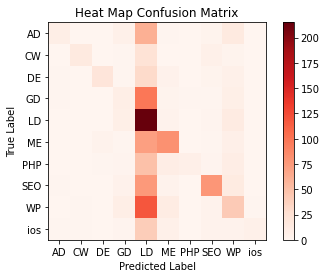

In [ ]:
# Visualizing a heat map of confusion matrix to evaluate the quality of the output of the classifier
conf_mat = confusion_matrix(label_test, label_predicted)
labels = sorted(set(label_predicted))

plt.figure()
plt.title("Heat Map Confusion Matrix")
plt.imshow(conf_mat, interpolation="nearest", cmap=plt.cm.Reds)
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()